# Notebook Instructions
<i>You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i>

# Mean Reversion Strategy on AUDCAD

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
df = pd.read_csv('AUDCAD.csv',index_col=0)

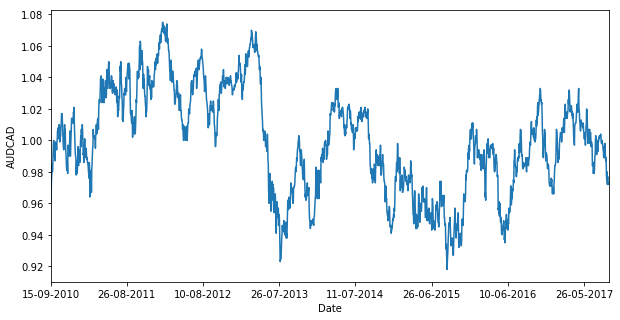

In [3]:
df.prices.plot(figsize=(10,5))
plt.ylabel("AUDCAD")
plt.show()

## Moving average and moving standard deviation

In [4]:
# Moving Average
df['moving_average'] = df.prices.rolling(5).mean()
# Moving Standard Deviation
df['moving_std_dev'] = df.prices.rolling(5).std()
df.head(7)

,prices,moving_average,moving_std_dev
Date,,,
15-09-2010,0.963,NaN,NaN
16-09-2010,0.961,NaN,NaN
17-09-2010,0.968,NaN,NaN
20-09-2010,0.975,NaN,NaN
21-09-2010,0.979,0.9692,0.007694
22-09-2010,0.985,0.9736,0.009370
23-09-2010,0.980,0.9774,0.006348


## Upper band and lower band

In [5]:
df['upper_band'] = df.moving_average + 0.5*df.moving_std_dev
df['lower_band'] = df.moving_average - 0.5*df.moving_std_dev
df.head(7)

,prices,moving_average,moving_std_dev,upper_band,lower_band
Date,,,,,
15-09-2010,0.963,NaN,NaN,NaN,NaN
16-09-2010,0.961,NaN,NaN,NaN,NaN
17-09-2010,0.968,NaN,NaN,NaN,NaN
20-09-2010,0.975,NaN,NaN,NaN,NaN
21-09-2010,0.979,0.9692,0.007694,0.973047,0.965353
22-09-2010,0.985,0.9736,0.009370,0.978285,0.968915
23-09-2010,0.980,0.9774,0.006348,0.980574,0.974226


## Long entry and exit

In [6]:
df['long_entry'] = df.prices < df.lower_band   
df['long_exit'] = df.prices >= df.moving_average
df.head(20)

,prices,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit
Date,,,,,,,
15-09-2010,0.963,NaN,NaN,NaN,NaN,False,False
16-09-2010,0.961,NaN,NaN,NaN,NaN,False,False
17-09-2010,0.968,NaN,NaN,NaN,NaN,False,False
20-09-2010,0.975,NaN,NaN,NaN,NaN,False,False
21-09-2010,0.979,0.9692,0.007694,0.973047,0.965353,False,True
22-09-2010,0.985,0.9736,0.009370,0.978285,0.968915,False,True
23-09-2010,0.980,0.9774,0.006348,0.980574,0.974226,False,True
24-09-2010,0.982,0.9802,0.003701,0.982051,0.978349,False,True
27-09-2010,0.989,0.9830,0.004062,0.985031,0.980969,False,True


## Long Positions

In [7]:
df['positions_long'] = np.nan  
df.loc[df.long_entry,'positions_long'] = 1  
df.loc[df.long_exit,'positions_long'] = 0  
df.head(20)

,prices,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,
15-09-2010,0.963,NaN,NaN,NaN,NaN,False,False,NaN
16-09-2010,0.961,NaN,NaN,NaN,NaN,False,False,NaN
17-09-2010,0.968,NaN,NaN,NaN,NaN,False,False,NaN
20-09-2010,0.975,NaN,NaN,NaN,NaN,False,False,NaN
21-09-2010,0.979,0.9692,0.007694,0.973047,0.965353,False,True,0.0
22-09-2010,0.985,0.9736,0.009370,0.978285,0.968915,False,True,0.0
23-09-2010,0.980,0.9774,0.006348,0.980574,0.974226,False,True,0.0
24-09-2010,0.982,0.9802,0.003701,0.982051,0.978349,False,True,0.0
27-09-2010,0.989,0.9830,0.004062,0.985031,0.980969,False,True,0.0


## Forward fill Long Positions

In [8]:
df.positions_long = df.positions_long.fillna(method='ffill')  
df.head(20)

,prices,moving_average,moving_std_dev,upper_band,lower_band,long_entry,long_exit,positions_long
Date,,,,,,,,
15-09-2010,0.963,NaN,NaN,NaN,NaN,False,False,NaN
16-09-2010,0.961,NaN,NaN,NaN,NaN,False,False,NaN
17-09-2010,0.968,NaN,NaN,NaN,NaN,False,False,NaN
20-09-2010,0.975,NaN,NaN,NaN,NaN,False,False,NaN
21-09-2010,0.979,0.9692,0.007694,0.973047,0.965353,False,True,0.0
22-09-2010,0.985,0.9736,0.009370,0.978285,0.968915,False,True,0.0
23-09-2010,0.980,0.9774,0.006348,0.980574,0.974226,False,True,0.0
24-09-2010,0.982,0.9802,0.003701,0.982051,0.978349,False,True,0.0
27-09-2010,0.989,0.9830,0.004062,0.985031,0.980969,False,True,0.0


## Short positions

In [9]:
df['short_entry'] = df.prices > df.upper_band   
df['short_exit'] = df.prices <= df.moving_average

df['positions_short'] = np.nan  
df.loc[df.short_entry,'positions_short'] = -1  
df.loc[df.short_exit,'positions_short'] = 0  

df.positions_short = df.positions_short.fillna(method='ffill')  

## Positions

In [10]:
df['positions'] = df.positions_long + df.positions_short

## Cumulative profit and loss (PnL)

In [11]:
df['price_difference']= df.prices - df.prices.shift(1)
df['pnl'] = df.positions.shift(1) * df.price_difference
df['cumpnl'] = df.pnl.cumsum()

## Plot the profit and loss (PnL)

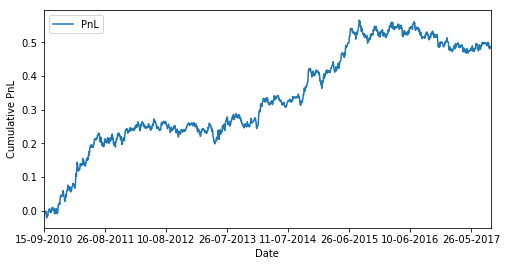

In [12]:
df.cumpnl.plot(label='PnL', figsize=(8,4))  
plt.xlabel('Date')  
plt.ylabel('Cumulative PnL')  
plt.legend()  
plt.show()